## Hands-On Data Preprocessing in Python
Learn how to effectively prepare data for successful data analytics
    
    AUTHOR: Dr. Roy Jafari 

### Chapter 6: Prediction 
#### Excercises

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ipywidgets import interact, widgets

# Excercise 1
“MLP has the potential to create prediction models that are more accurate than predictions models that are created by linear regression.” This statement is generally correct. In this exercise, we want to explore one of the reasons why the statement is correct. Answer the following questions.

    a) The following formula shows the linear equation that we used to connect the dependent and independent attributes of the MSU number of applications problem. Count and report the number of coefficients that Linear Regression can play with to fit the equation to the data.  

**N_Applications= β_0+β_1×P_Football_Performance+β_2×SMA2**

	

    b) Figure 6. 8. shows the MLP network structure we used to connect the dependent and independent attributes of the MSU number of applications problem. Count and report the number of connections’ weight MLP can play with to fit the network to the data.

    c)Use your answer in a, and b to state why MLP has more potential in creating prediction models with higher accuracy. 


a) 3

b) 18

c) MLP has more flexibility and capacity to learn complex patterns in data because it has more parameters (weights) and non-linear activation functions, which enables it to fit the data more accurately than a simple linear regression model.

# Excercise 2
2.	In this exercise, we will be using ToyotaCorolla_preprocessed.csv. This dataset has the following columns: Age, Milage_KM, Quarterly_Tax, Weight, 	Fuel_Type_CNG, Fuel_Type_Diesel, Fuel_Type_Petrol, and Price. Each data object in this dataset is a used Toyota Corolla car. We would like to use this dataset to predict the price of used Toyota Corolla cars. 


    a.Read the data into the pandas DataFrame car_df.

In [ ]:
car_df = pd.read_csv("ToyotaCorolla_preprocessed.csv")
car_df.head()

    b.	Use the skills you picked up in the previous chapter to come up with data visualizations that show the relationship between the attribute price and the rest of the attributes.

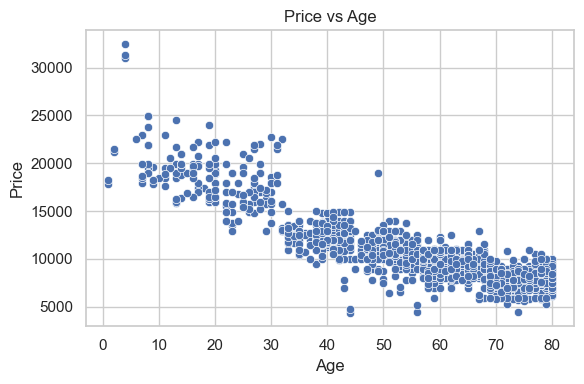

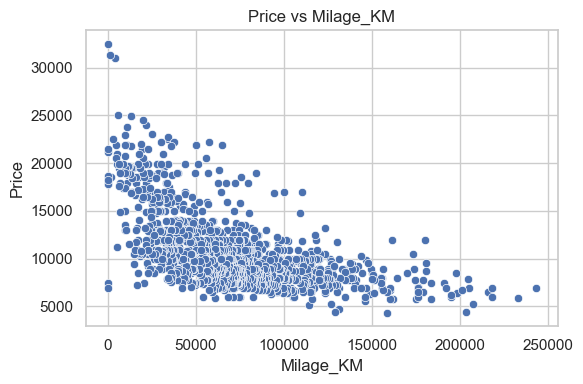

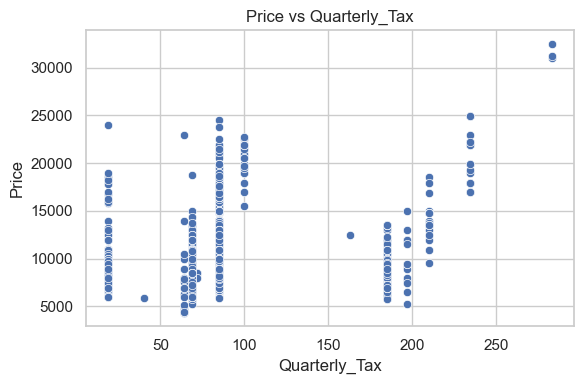

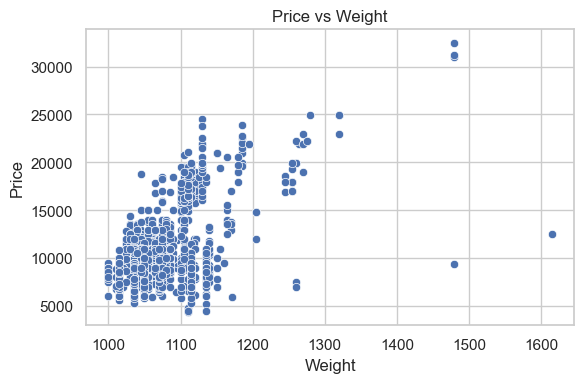

In [21]:
numerical_features = ['Age', 'Milage_KM', 'Quarterly_Tax', 'Weight']

for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=car_df, x=feature, y='Price')
    plt.title(f'Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


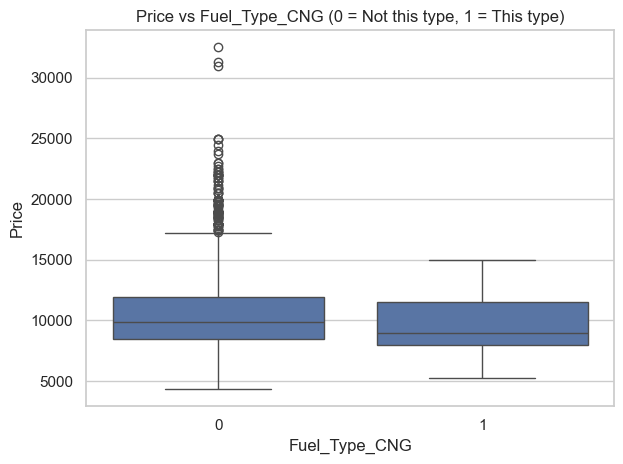

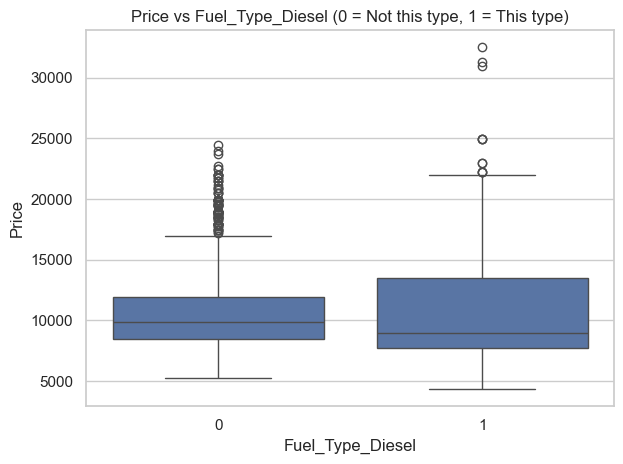

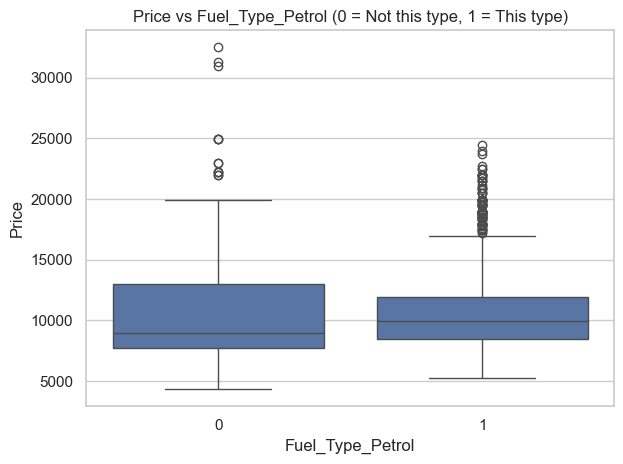

In [24]:
fuel_columns = ['Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']

for fuel in fuel_columns:
    sns.boxplot(data=car_df, x=fuel, y='Price')
    plt.title(f'Price vs {fuel} (0 = Not this type, 1 = This type)')
    plt.tight_layout()
    plt.show()

    c.	Use the visuals in b, to describe the relationship each of the attributes has with the attribute price.

d.	Create the correlation matrix for all the attributes, and report the correlation values for the relationship that you investigated in b and c.

In [25]:
car_corr = car_df.corr()
car_corr

,Age,Milage_KM,Quarterly_Tax,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Price
Age,1.000000,0.505222,-0.198211,-0.470149,0.002464,-0.097541,0.092396,-0.876539
Milage_KM,0.505222,1.000000,0.278852,-0.028181,0.144240,0.403745,-0.433893,-0.569721
Quarterly_Tax,-0.198211,0.278852,1.000000,0.626085,0.233774,0.792706,-0.835435,0.219021
Weight,-0.470149,-0.028181,0.626085,1.000000,0.052727,0.568043,-0.560423,0.581125
Fuel_Type_CNG,0.002464,0.144240,0.233774,0.052727,1.000000,-0.038102,-0.296704,-0.039603
Fuel_Type_Diesel,-0.097541,0.403745,0.792706,0.568043,-0.038102,1.000000,-0.942971,0.053912
Fuel_Type_Petrol,0.092396,-0.433893,-0.835435,-0.560423,-0.296704,-0.942971,1.000000,-0.038329
Price,-0.876539,-0.569721,0.219021,0.581125,-0.039603,0.053912,-0.038329,1.000000


e.	Did the visual investigations you performed in b and c was confirmed in d. For what types of attributes the conclusions for c were not confirmed in d? 

f.	Perform a linear regression to predict the attribute price. Use all the attributes that you detect they had a meaningful relationship with the attribute price as independent attributes. Predict the price of a car with the following specifications: Age: 74 months, Milage_KM: 124057, Quarterly_Tax: 69, and Weight: 1050. The car fuel type is diesel.

In [30]:
from sklearn.linear_model import LinearRegression

features = ['Age', 'Milage_KM', 'Quarterly_Tax', 'Weight', 'Fuel_Type_Diesel']
X = car_df[features]
y = car_df['Price']

# Train the model
model = LinearRegression()
model.fit(X, y)

# Define input for prediction
input_car = pd.DataFrame([{
    'Age': 74,
    'Milage_KM': 124057,
    'Quarterly_Tax': 69,
    'Weight': 1050,
    'Fuel_Type_Diesel': 1
}])

# Predict the price
predicted_price = model.predict(input_car)
print(f"Predicted Price: {predicted_price[0]:.2f}")

Predicted Price: 4838.23


g.	Implement an MLP algorithm to predict the attribute price. Use all the attributes that you used in f and predict the price of the same new car presented in f. Use (5,10) network structure (hidden_layer_sizes), and set the max_iter as 500. 

In [35]:
from sklearn.neural_network import MLPRegressor

features = ['Age', 'Milage_KM', 'Quarterly_Tax', 'Weight', 'Fuel_Type_Diesel']
X = car_df[features]
y = car_df['Price']

# Train the model
model = MLPRegressor(hidden_layer_sizes=(5, 10), max_iter=500)
model.fit(X, y)

# Define input for prediction
input_car = pd.DataFrame([{
    'Age': 74,
    'Milage_KM': 124057,
    'Quarterly_Tax': 69,
    'Weight': 1050,
    'Fuel_Type_Diesel': 1
}])

# Predict the price
predicted_price = model.predict(input_car)
print(f"Predicted Price: {predicted_price[0]:.2f}")

Predicted Price: 7461.22


h.	The actual price of the new car presented under f is 7950. Report which algorithm performed a better prediction. 

MLP